## yolov5; 모델 불러오기 확인 테스트

In [6]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 10.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
print(torch.__version__)

1.10.0+cu111


In [4]:
!python --version

Python 3.6.9


In [7]:
import torch

# Model
models = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /home/appuser/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-2-18 torch 1.10.0+cu111 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [15]:
import os 
LOCAL_RANK = int(os.getenv('LOCAL_RANK', -1))
print(LOCAL_RANK)

-1


In [17]:
RANK = int(os.getenv('RANK', -1))
WORLD_SIZE = int(os.getenv('WORLD_SIZE', 1))
print(RANK, WORLD_SIZE)

-1 1


In [37]:
#device = torch.device('cuda', LOCAL_RANK)
#cuda = device.type != 'cpu'
RANK == -1 and torch.cuda.device_count() > 1

True

In [19]:
import torch

# Model
models = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /home/appuser/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-2-18 torch 1.10.0+cu111 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [20]:
for k, v in models.named_parameters():
    print(k)

model.model.model.0.conv.weight
model.model.model.0.conv.bias
model.model.model.1.conv.weight
model.model.model.1.conv.bias
model.model.model.2.cv1.conv.weight
model.model.model.2.cv1.conv.bias
model.model.model.2.cv2.conv.weight
model.model.model.2.cv2.conv.bias
model.model.model.2.cv3.conv.weight
model.model.model.2.cv3.conv.bias
model.model.model.2.m.0.cv1.conv.weight
model.model.model.2.m.0.cv1.conv.bias
model.model.model.2.m.0.cv2.conv.weight
model.model.model.2.m.0.cv2.conv.bias
model.model.model.3.conv.weight
model.model.model.3.conv.bias
model.model.model.4.cv1.conv.weight
model.model.model.4.cv1.conv.bias
model.model.model.4.cv2.conv.weight
model.model.model.4.cv2.conv.bias
model.model.model.4.cv3.conv.weight
model.model.model.4.cv3.conv.bias
model.model.model.4.m.0.cv1.conv.weight
model.model.model.4.m.0.cv1.conv.bias
model.model.model.4.m.0.cv2.conv.weight
model.model.model.4.m.0.cv2.conv.bias
model.model.model.4.m.1.cv1.conv.weight
model.model.model.4.m.1.cv1.conv.bias
mode

In [25]:
for i in range([0][0]) :
    print(i)

In [32]:
#pretrained =True
import torch.nn as nn
g0, g1, g2 = [], [], []  # optimizer parameter groups
for v in models.modules():
    if hasattr(v, 'bias') and isinstance(v.bias, nn.Parameter):  # bias
        g2.append(v.bias)
    if isinstance(v, nn.BatchNorm2d):  # weight (no decay)
        g0.append(v.weight)
    elif hasattr(v, 'weight') and isinstance(v.weight, nn.Parameter):  # weight (with decay)
        g1.append(v.weight)
print(g0,g1,g2)

[] [Parameter containing:
tensor([[[[-7.49795e-02, -5.15774e-01,  2.88282e-01, -3.56197e-01,  1.26094e-01,  4.96302e-01],
          [-2.67890e-02, -6.40680e-01,  8.80520e-01, -2.69998e-01, -6.17409e-01, -6.00311e-01],
          [ 6.54928e-01, -1.73729e+00, -7.12395e-01,  2.84661e-02,  2.99396e+00,  3.30551e-01],
          [-2.55750e-01,  2.60262e+00,  3.54298e+00, -1.04333e+01,  1.06479e+00,  4.14139e+00],
          [-1.16548e+00,  2.41454e+00,  6.16649e+00, -1.19530e+01,  9.59358e-02,  2.89327e+00],
          [ 3.74957e-01, -1.75819e+00,  1.37445e+00, -2.86858e+00,  2.68620e+00,  7.67962e-01]],

         [[ 8.11536e-02, -1.42835e-01,  3.67596e-01, -1.73795e-02,  3.54060e-01,  1.72281e-01],
          [ 1.12855e-01, -4.90959e-02,  4.17701e-01,  1.89853e-01,  7.81853e-02, -5.95087e-01],
          [ 3.87305e-01, -8.99517e-01, -1.24337e+00, -6.56828e-01,  3.54108e+00, -7.91352e-02],
          [-1.64682e-01,  4.52893e+00,  2.89517e+00, -1.35564e+01, -3.49311e-01,  3.24852e+00],
          [-

         [[ 2.13981e-05]]]], device='cuda:0')] [Parameter containing:
tensor([  2.64690,   0.75805,   2.26872,  -0.91547,   1.37628,   1.82571,   1.93670,   1.86729,   2.67510,   1.41660,  -2.08887,   0.96721,  -0.33573,   2.33940, -10.48958,  -0.83876,   2.20210,   2.60777,   2.16552,   1.80810,   2.64890,   1.08764,  -0.45456,   2.75478,   1.58582,  -0.86085,   2.21032,   4.50869,
          2.37166,  -0.42254,   1.64754,   1.76699], device='cuda:0'), Parameter containing:
tensor([ 2.68005e+00,  2.56651e-01,  1.42372e+00,  3.59450e+00,  1.56966e+00,  2.57477e-01,  9.33303e-01,  3.41461e+00, -4.89740e-01, -5.59832e+00,  8.05283e-01,  4.11961e-01,  3.53545e+00, -2.76053e-01, -4.38055e-01,  5.46134e-01,  2.53885e+00,  7.01771e+00, -1.06303e-01,  3.02174e-01,  1.77261e+00,  3.18676e+00,
        -3.13467e-01,  5.80359e-01,  4.70560e-02,  3.63202e+00,  1.92458e+00,  1.69887e+00,  1.86332e+00,  8.08971e-01,  8.33362e-01,  1.52316e+00,  1.38117e+00,  2.14000e-01,  1.68183e-01, -9.80453e-02,  

In [42]:
models.train()

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

## train test 이미지 분리

### 백내장_초음파 무

In [1]:
import os
normal_jpg_nor = [f[:-3] for f in os.listdir('/home/appuser/animaldata_62_mu/input/train/백내장/무') if  (f[-3:]=="jpg") ]
print(len(normal_jpg_nor))

8600


In [2]:
import os
normal_jpg_abn = [f[:-3] for f in os.listdir('/home/appuser/animaldata_62_mu/input/train/백내장/유') if  (f[-3:]=="jpg") ]
print(len(normal_jpg_abn))

8600


In [3]:
import random
normal_jpg_nor_for_test = random.sample(normal_jpg_nor,round(8600*0.2))

In [4]:
len(normal_jpg_nor_for_test)

1720

In [5]:
normal_jpg_nor_for_test[0]

'crop_D8_aac468a8-63a6-11ec-b317-0a7404972c70.'

In [6]:
pwd

'/home/appuser/animaldata_62_mu/code/src/yolo'

In [7]:
import shutil
for file in normal_jpg_nor_for_test:
    shutil.move(f'/home/appuser/animaldata_62_mu/input/train/백내장/무/{file}jpg', f'/home/appuser/animaldata_62_mu/input/test/백내장/무/{file}jpg') 

In [16]:
import shutil
for file in normal_jpg_nor_for_test:
    shutil.move(f'/home/appuser/animaldata_62_mu/input/train/백내장/무/{file}json', f'/home/appuser/animaldata_62_mu/input/test/백내장/무/{file}json') 

### 백내장_초음파 유

In [10]:
import os
normal_jpg_abn = [f[:-3] for f in os.listdir('/home/appuser/animaldata_62_mu/input/train/백내장/유') if  (f[-3:]=="jpg") ]
print(len(normal_jpg_abn))

8600


In [12]:
import random
normal_jpg_abn_for_test = random.sample(normal_jpg_abn,round(len(normal_jpg_abn)*0.2))

In [13]:
len(normal_jpg_abn_for_test)

1720

In [14]:
normal_jpg_abn_for_test[0]

'crop_D50_131fe825-60a5-11ec-8402-0a7404972c70.'

In [17]:
import shutil
for file in normal_jpg_abn_for_test:
    shutil.move(f'/home/appuser/animaldata_62_mu/input/train/백내장/유/{file}jpg', f'/home/appuser/animaldata_62_mu/input/test/백내장/유/{file}jpg') 

## 백내장_일반_검안

 - 반려견> 표면> 검안경 및 일반카메라
 - JSON 내 'Meta.device' 프로퍼티 값이 검안경, 스마트폰, 일반카메라, 기타 있을 수 있음 (확인 필요)

### 백내장_일반_검안 무

In [1]:
import os
surface_jpg_nor = [f[:-3] for f in os.listdir('/home/appuser/animaldata_62_mu/input/train/백내장_일반_검안/무') if  (f[-3:]=="jpg") ]
print(len(surface_jpg_nor))

4464


In [2]:
import random
surface_jpg_nor_for_test = random.sample(surface_jpg_nor,round(len(surface_jpg_nor)*0.2))

In [3]:
len(surface_jpg_nor_for_test)

893

In [4]:
surface_jpg_nor_for_test[0]

'crop_D56_26f4e96d-60a5-11ec-8402-0a7404972c70.'

In [5]:
import shutil
for file in surface_jpg_nor_for_test:
    shutil.move(f'/home/appuser/animaldata_62_mu/input/train/백내장_일반_검안/무/{file}jpg', f'/home/appuser/animaldata_62_mu/input/test/백내장_일반_검안/무/{file}jpg') 

In [6]:
import shutil
for file in surface_jpg_nor_for_test:
    shutil.move(f'/home/appuser/animaldata_62_mu/input/train/백내장_일반_검안/무/{file}json', f'/home/appuser/animaldata_62_mu/input/test/백내장_일반_검안/무/{file}json') 

### 백내장_일반_검안 초기

In [1]:
import os
surface_jpg_early = [f[:-3] for f in os.listdir('/home/appuser/animaldata_62_mu/input/train/백내장_일반_검안/초기') if  (f[-3:]=="jpg") ]
print(len(surface_jpg_early))

8600


In [2]:
import random
surface_jpg_early_for_test = random.sample(surface_jpg_early,round(len(surface_jpg_early)*0.2))

In [3]:
len(surface_jpg_early_for_test)

1720

In [4]:
surface_jpg_early_for_test[0]

'crop_D15_2efbb525-60a5-11ec-8402-0a7404972c70.'

In [5]:
import shutil
for file in surface_jpg_early_for_test:
    shutil.move(f'/home/appuser/animaldata_62_mu/input/train/백내장_일반_검안/초기/{file}jpg', f'/home/appuser/animaldata_62_mu/input/test/백내장_일반_검안/초기/{file}jpg') 

In [6]:
import shutil
for file in surface_jpg_early_for_test:
    shutil.move(f'/home/appuser/animaldata_62_mu/input/train/백내장_일반_검안/초기/{file}json', f'/home/appuser/animaldata_62_mu/input/test/백내장_일반_검안/초기/{file}json') 

### 백내장_일반_검안 비성숙

In [1]:
import os
surface_jpg_imm = [f[:-3] for f in os.listdir('/home/appuser/animaldata_62_mu/input/train/백내장_일반_검안/비성숙') if  (f[-3:]=="jpg") ]
print(len(surface_jpg_imm))

8600


In [2]:
import random
surface_jpg_imm_for_test = random.sample(surface_jpg_imm,round(len(surface_jpg_imm)*0.2))

In [4]:
len(surface_jpg_imm_for_test)

1720

In [5]:
surface_jpg_imm_for_test[0]

'crop_D48_11235393-60a5-11ec-8402-0a7404972c70.'

In [6]:
import shutil
for file in surface_jpg_imm_for_test:
    shutil.move(f'/home/appuser/animaldata_62_mu/input/train/백내장_일반_검안/비성숙/{file}jpg', f'/home/appuser/animaldata_62_mu/input/test/백내장_일반_검안/비성숙/{file}jpg') 

In [7]:
import shutil
for file in surface_jpg_imm_for_test:
    shutil.move(f'/home/appuser/animaldata_62_mu/input/train/백내장_일반_검안/비성숙/{file}json', f'/home/appuser/animaldata_62_mu/input/test/백내장_일반_검안/비성숙/{file}json') 

### 백내장_일반_검안 성숙

In [8]:
import os
surface_jpg_mat = [f[:-3] for f in os.listdir('/home/appuser/animaldata_62_mu/input/train/백내장_일반_검안/성숙') if  (f[-3:]=="jpg") ]
print(len(surface_jpg_mat))

8593


In [9]:
import random
surface_jpg_mat_for_test = random.sample(surface_jpg_mat,round(len(surface_jpg_mat)*0.2))

In [10]:
len(surface_jpg_mat_for_test)

1719

In [11]:
surface_jpg_mat_for_test[0]

'crop_D15_2fbfefc0-60a5-11ec-8402-0a7404972c70.'

In [12]:
import shutil
for file in surface_jpg_mat_for_test:
    shutil.move(f'/home/appuser/animaldata_62_mu/input/train/백내장_일반_검안/성숙/{file}jpg', f'/home/appuser/animaldata_62_mu/input/test/백내장_일반_검안/성숙/{file}jpg') 

In [13]:
import shutil
for file in surface_jpg_mat_for_test:
    shutil.move(f'/home/appuser/animaldata_62_mu/input/train/백내장_일반_검안/성숙/{file}json', f'/home/appuser/animaldata_62_mu/input/test/백내장_일반_검안/성숙/{file}json') 

## 끄적끄적

In [9]:
root = '/home/appuser/animaldata_62_mu/input'
disease_code = '백내장_초음파'
split_ratio = 0.2
img_resize = 640
mode = "train" 

In [58]:
"""Dataset.py"""
import cv2
from torch.utils.data import Dataset, dataloader, distributed # #배치에 대해서 반복하기 편리하게 해줍니다.
from IPython.display import Image
import matplotlib.pyplot as plt
import os
import matplotlib.image as img
plt.rcParams["figure.figsize"] = (5,5)

class PETDataset_eye(Dataset): 
    
    def __init__(self, root,disease_code ,split_ratio, mode, img_resize) : # file_list # imgsz, stride=int(stride)
        self.root = root
        self.disease_code = disease_code
        self.mode = mode
        self.split_ratio = split_ratio        
        self.dir = {"train": self.root + '/' + "train" + '/' + self.disease_code,
                    "test": self.root + '/' + "test" + '/' + self.disease_code}
        self.file_list = []
        self.img_resize= img_resize
                
        if self.mode == "train" : 
            train_무_images = [f"{self.dir['train']}/무/" + f for f in os.listdir(f"{self.dir['train']}/무") if (f[-3:]=="jpg")]
            train_유_images = [f"{self.dir['train']}/유/" + f for f in os.listdir(f"{self.dir['train']}/유") if (f[-3:]=="jpg")]
            self.file_list = train_무_images[:int(len(train_무_images) * (1 - self.split_ratio))] + \
                                train_유_images[:int(len(train_유_images) * (1 - self.split_ratio))]
            

        elif self.mode == "valid" : 
            train_무_images = [f"{self.dir['train']}/무/" + f for f in os.listdir(f"{self.dir['train']}/무") if (f[-3:]=="jpg")]
            train_유_images = [f"{self.dir['train']}/유/" + f for f in os.listdir(f"{self.dir['train']}/유") if (f[-3:]=="jpg")]
            self.file_list = train_무_images[int(len(train_무_images) * (1 - self.split_ratio)):] + \
                              train_유_images[int(len(train_유_images) * (1 - self.split_ratio)):]
    
        else : #mode = "test"
            test_무_images = [f"{self.dir['test']}/무/" + f for f in os.listdir(f"{self.dir['test']}/무") if (f[-3:]=="jpg")]
            test_유_images = [f"{self.dir['test']}/유/" + f for f in os.listdir(f"{self.dir['test']}/유") if (f[-3:]=="jpg")]
            self.file_list = test_무_images + test_유_images           
            
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, index): # model input, target for loss from file_list
        img_path = self.file_list[index]
        img = self.resize_img(img_path)
#         plt.imshow(img)
#         plt.show()
        json_path = os.path.join(img_path.replace(".jpg", ".json"))    
        with open(json_path) as f :
            anno=json.load(f)
        anno_label = anno['label']
        label["file_name"] = anno_label["label_filename"]
        label["bbox"] = [0,0,400,400]  #XYXY
        label["diease_name"]=  anno['label']['label_disease_nm']
        label["category_id"]=  anno['label']['label_category_id'] # 진단부위
        label["category_name"]=  anno['label']['label_disease_lv_3']
        
        return {'input': img, 'target': label} # 하나 이미지에 대한 정의
    
    def resize_img(self, image_path) :   # stride 추가하기 근데 뭘 추가해야할려나.
        im = cv2.imread(image_path)  # BGR
        plt.imshow(im)
        plt.show()
        h0, w0 = im.shape[:2]
        r = self.img_resize / max(h0, w0)  # ratio
        if r != 1:  # if sizes are not equal
            im_2 = cv2.resize(im,(int(w0 * r), int(h0 * r)),
                interpolation=cv2.INTER_LINEAR if r > 1 else cv2.INTER_AREA)
        return im_2

In [11]:
img_resize

640

In [66]:
pet = PETDataset_eye(root, disease_code, split_ratio, mode, img_resize)
pet.__len__()
pet.file_list[0]
pet[0]["input"][-1]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

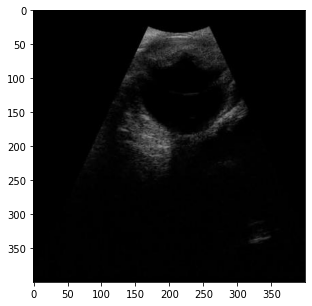

In [30]:
pet_2 = PETDataset_eye(root, disease_code, split_ratio, mode, img_resize)
pet_2.__len__()
pet_2.file_list[0]
pet_2[100]

In [36]:
import json
img_path_tmp = '/home/appuser/animaldata_62_mu/input/train/백내장_초음파/무/crop_D17_aa9e0bad-63a6-11ec-b317-0a7404972c70.jpg'
json_path_tmp = os.path.join(img_path_tmp.replace(".jpg", ".json")) 
print(json_path_tmp)
with open(json_path_tmp) as f :
    annos=json.load(f)
annos

/home/appuser/animaldata_62_mu/input/train/백내장_초음파/무/crop_D17_aa9e0bad-63a6-11ec-b317-0a7404972c70.json


{'images': {'meta': {'file_name': 'D17_aa9e0bad-63a6-11ec-b317-0a7404972c70.jpg',
   'date_time': '2021-12-02 00:00:00',
   'device': '안구초음파',
   'gender': 1,
   'age': 4,
   'breed': '말티즈',
   'medical_type': 1,
   'width_height': [1040, 1020],
   'eye_position': '오른쪽눈',
   'image_resolution': [0, 0]}},
 'label': {'label_filename': 'crop_D17_aa9e0bad-63a6-11ec-b317-0a7404972c70.jpg',
  'label_category_id': 1,
  'label_path': '라벨링데이터/안구/개/안구/안구초음파/백내장/무/crop_D17_aa9e0bad-63a6-11ec-b317-0a7404972c70.jpg',
  'label_deleted': 0,
  'label_bbox': [0.0, 0.0, 1040.0, 1020.0],
  'label_disease_nm': '백내장',
  'label_disease_lv_1': '무',
  'label_disease_lv_2': '무',
  'label_disease_lv_3': '무'}}

In [35]:
im_tmp= cv2.imread(img_path_tmp)
im_tmp.shape

(400, 400, 3)

In [55]:
import json
img_path_tmp = '/home/appuser/animaldata_62_mu/input/test/백내장_초음파/유/crop_D0_13233139-60a5-11ec-8402-0a7404972c70.jpg'
im_tmp= cv2.imread(img_path_tmp)
print(im_tmp.shape)
json_path_tmp = os.path.join(img_path_tmp.replace(".jpg", ".json")) 
print(json_path_tmp)
label = {}
with open(json_path_tmp) as f :
    anno=json.load(f)
anno_label = anno['label']
label["file_name"] = anno_label["label_filename"]
label["bbox"] = [0,0,400,400]
label["diease_name"]=  anno['label']['label_disease_nm']
label["category_id"]=  anno['label']['label_category_id'] # 진단부위
label["category_name"]=  anno['label']['label_disease_lv_3'] # 확정라벨링 
#label_disease_lv_1 : 수의사1 라벨링 #label_disease_lv_2 수의사2 라벨링

(400, 400, 3)
/home/appuser/animaldata_62_mu/input/test/백내장_초음파/유/crop_D0_13233139-60a5-11ec-8402-0a7404972c70.json
{'file_name': 'crop_D0_13233139-60a5-11ec-8402-0a7404972c70.jpg', 'bbox': [0, 0, 400, 400], 'diease_name': '백내장', 'category_id': 1, 'category_name': '유'}
